In [413]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

In [414]:
data=pd.read_csv('Day 2 data-anomaly-1Hz.csv')

In [415]:
data.head()

,DateTime,Depth,Hook Load,SPP1,P_rate1,SPP2,P_rate2,rpm,torque,wob,rop,SPP,p_rate,gyroxrms(rpm),shxrms_g,shyrms_g,shzrms_g
0,2020-05-07 15:00:00,196,34.5675,0.918750,0.0,0.0,0.0,0.0,126.563,NaN,NaN,45.93750,0.0,1.326284,0.379556,0.396157,0.415867
1,2020-05-07 15:00:01,196,34.4775,0.918750,0.0,0.0,0.0,0.0,117.188,NaN,NaN,45.93750,0.0,1.326284,0.379556,0.396157,0.415867
2,2020-05-07 15:00:02,196,34.4325,0.907813,0.0,0.0,0.0,0.0,117.188,NaN,NaN,45.39065,0.0,1.326284,0.379556,0.396157,0.415867
3,2020-05-07 15:00:03,196,34.4325,0.929688,0.0,0.0,0.0,0.0,117.188,NaN,NaN,46.48440,0.0,1.326284,0.379556,0.396157,0.415867
4,2020-05-07 15:00:04,196,34.5600,0.940625,0.0,0.0,0.0,0.0,117.188,NaN,NaN,47.03125,0.0,1.326284,0.379556,0.396157,0.415867


In [416]:
data.isnull().sum()

DateTime             0
Depth                0
Hook Load            0
SPP1                 0
P_rate1              0
SPP2                 0
P_rate2              0
rpm                  6
torque               0
wob               4126
rop              11089
SPP                  0
p_rate               0
gyroxrms(rpm)        0
shxrms_g             0
shyrms_g             0
shzrms_g             0
dtype: int64

In [417]:
data.fillna(0, inplace=True)

In [418]:
data.isnull().sum()

DateTime         0
Depth            0
Hook Load        0
SPP1             0
P_rate1          0
SPP2             0
P_rate2          0
rpm              0
torque           0
wob              0
rop              0
SPP              0
p_rate           0
gyroxrms(rpm)    0
shxrms_g         0
shyrms_g         0
shzrms_g         0
dtype: int64

In [419]:
data['DateTime']=pd.to_datetime(data['DateTime'])

In [420]:
# time with int to plot easily
data['time_epoch'] = (data['DateTime'].astype(np.int64)/100000000000).astype(np.int64)
data.head()

,DateTime,Depth,Hook Load,SPP1,P_rate1,SPP2,P_rate2,rpm,torque,wob,rop,SPP,p_rate,gyroxrms(rpm),shxrms_g,shyrms_g,shzrms_g,time_epoch
0,2020-05-07 15:00:00,196,34.5675,0.918750,0.0,0.0,0.0,0.0,126.563,0.0,0.0,45.93750,0.0,1.326284,0.379556,0.396157,0.415867,15888636
1,2020-05-07 15:00:01,196,34.4775,0.918750,0.0,0.0,0.0,0.0,117.188,0.0,0.0,45.93750,0.0,1.326284,0.379556,0.396157,0.415867,15888636
2,2020-05-07 15:00:02,196,34.4325,0.907813,0.0,0.0,0.0,0.0,117.188,0.0,0.0,45.39065,0.0,1.326284,0.379556,0.396157,0.415867,15888636
3,2020-05-07 15:00:03,196,34.4325,0.929688,0.0,0.0,0.0,0.0,117.188,0.0,0.0,46.48440,0.0,1.326284,0.379556,0.396157,0.415867,15888636
4,2020-05-07 15:00:04,196,34.5600,0.940625,0.0,0.0,0.0,0.0,117.188,0.0,0.0,47.03125,0.0,1.326284,0.379556,0.396157,0.415867,15888636


# Minute Data

In [421]:
test=pd.DataFrame(data.groupby('DateTime').sum())

In [422]:
test=test.reset_index()

In [423]:
test.to_excel('Anomaly-grouped.xlsx')

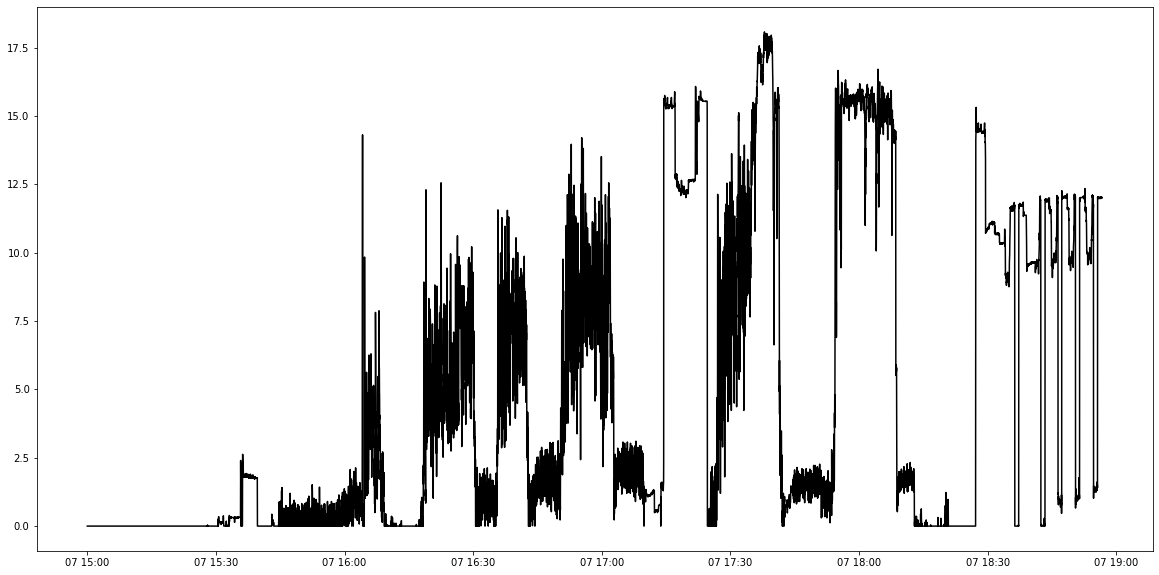

In [424]:
# Visualizing sections
plt.figure(figsize=(20,10))
plt.plot(test['DateTime'], test['wob'], color='black')

# Data Analysis-Full Section Analysis

In [434]:
#Data for the analysis
X=data.drop(['Depth','Hook Load','SPP1','P_rate1','SPP2','P_rate2','torque','rop'], axis=1)


In [426]:
#taking usefull features and standardize them
from sklearn.preprocessing import StandardScaler
x=X.iloc[:,1:9]
scale=StandardScaler()
np_scaled=scale.fit_transform(x)
df=pd.DataFrame(np_scaled)

In [427]:
#Training the model
from sklearn.ensemble import IsolationForest
seed=12345
model=IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [428]:
IF_predict=model.predict(df)
IF_score=model.score_samples(df)

In [429]:
IF_predictions = pd.DataFrame({"predicted_class": list(map(lambda IF: 1*(IF == -1), IF_predict)), "predict": IF_score})
IF_predictions

,predicted_class,predict
0,0,-0.394339
1,0,-0.394339
2,0,-0.394339
3,0,-0.394339
4,0,-0.393718
...,...,...
14194,0,-0.422898
14195,0,-0.421962
14196,0,-0.421486
14197,0,-0.422984


In [430]:
X['anomaly']=IF_predict
X

,DateTime,rpm,wob,SPP,p_rate,gyroxrms(rpm),shxrms_g,shyrms_g,shzrms_g,time_epoch,anomaly
0,2020-05-07 15:00:00,0.0,0.000,45.93750,0.0,1.326284,0.379556,0.396157,0.415867,15888636,1
1,2020-05-07 15:00:01,0.0,0.000,45.93750,0.0,1.326284,0.379556,0.396157,0.415867,15888636,1
2,2020-05-07 15:00:02,0.0,0.000,45.39065,0.0,1.326284,0.379556,0.396157,0.415867,15888636,1
3,2020-05-07 15:00:03,0.0,0.000,46.48440,0.0,1.326284,0.379556,0.396157,0.415867,15888636,1
4,2020-05-07 15:00:04,0.0,0.000,47.03125,0.0,1.326284,0.379556,0.396157,0.415867,15888636,1
...,...,...,...,...,...,...,...,...,...,...,...
14194,2020-05-07 18:56:34,0.0,12.045,203.98440,0.0,0.007335,0.370820,0.366437,0.397280,15888777,1
14195,2020-05-07 18:56:35,0.0,12.000,207.81255,0.0,0.007335,0.370820,0.366437,0.397280,15888777,1
14196,2020-05-07 18:56:36,0.0,12.000,202.89065,0.0,0.004911,0.371918,0.358678,0.393780,15888777,1
14197,2020-05-07 18:56:37,0.0,12.000,208.90625,0.0,0.004911,0.371918,0.358678,0.393780,15888777,1


In [431]:
outlier=X.loc[X['anomaly']==-1]
outlier_index=list(outlier.index)
print(X['anomaly'].value_counts())

 1    11359
-1     2840
Name: anomaly, dtype: int64


In [432]:
# visualisation of anomaly (viz 2)
#a = X.loc[X['anomaly'] == 1, 'shxrms_g']
#b = X.loc[X['anomaly'] ==-1, 'shxrms_g']

#fig, axs = plt.subplots()
#axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label = ['normal', 'anomaly'])
#plt.legend()
#plt.show()

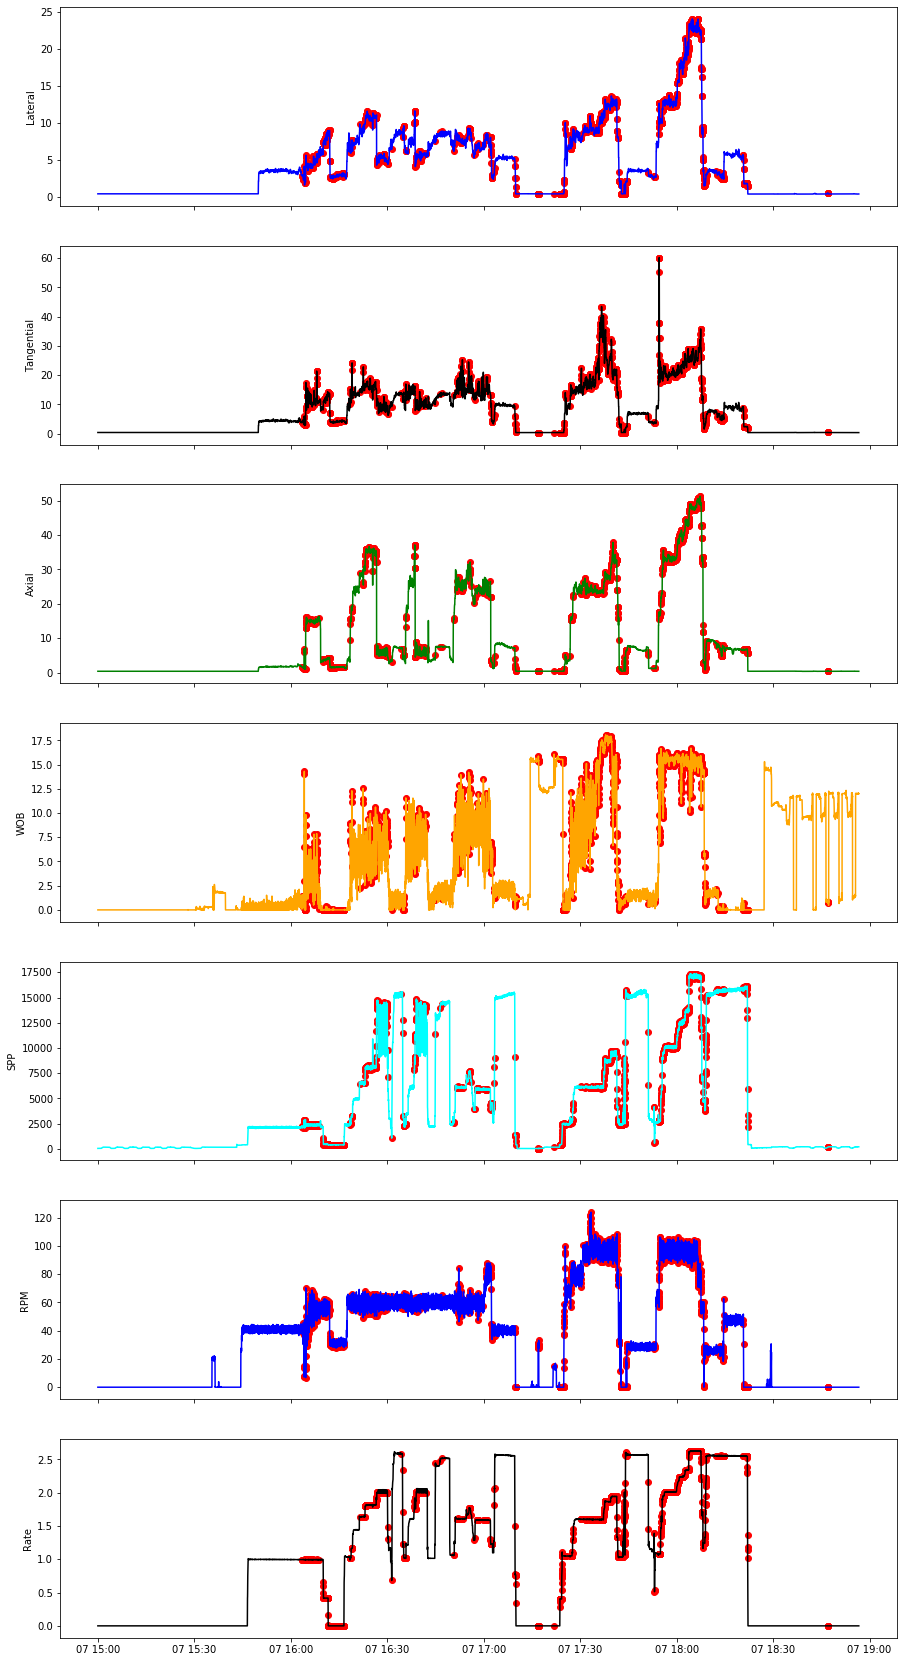

In [433]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(7,1, figsize=(15,30), sharex=True)
a = X[X['anomaly']==-1] #anomaly

ax[0].plot(X['DateTime'], X['shzrms_g'], color='blue')
ax[0].scatter(a['DateTime'],a['shzrms_g'], color='red')
ax[1].plot(X['DateTime'], X['shyrms_g'], color='black')
ax[1].scatter(a['DateTime'],a['shyrms_g'], color='red')
ax[2].plot(X['DateTime'], X['shxrms_g'], color='green')
ax[2].scatter(a['DateTime'],a['shxrms_g'], color='red')
ax[3].plot(X['DateTime'], X['wob'], color='orange')
ax[3].scatter(a['DateTime'],a['wob'], color='red')
ax[4].plot(X['DateTime'], X['SPP'], color='cyan')
ax[4].scatter(a['DateTime'],a['SPP'], color='red')
ax[5].plot(X['DateTime'], X['rpm'], color='blue')
ax[5].scatter(a['DateTime'],a['rpm'], color='red')
ax[6].plot(X['DateTime'], X['p_rate'], color='black')
ax[6].scatter(a['DateTime'],a['p_rate'], color='red')


ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")


plt.show()

# Sectional Analysis

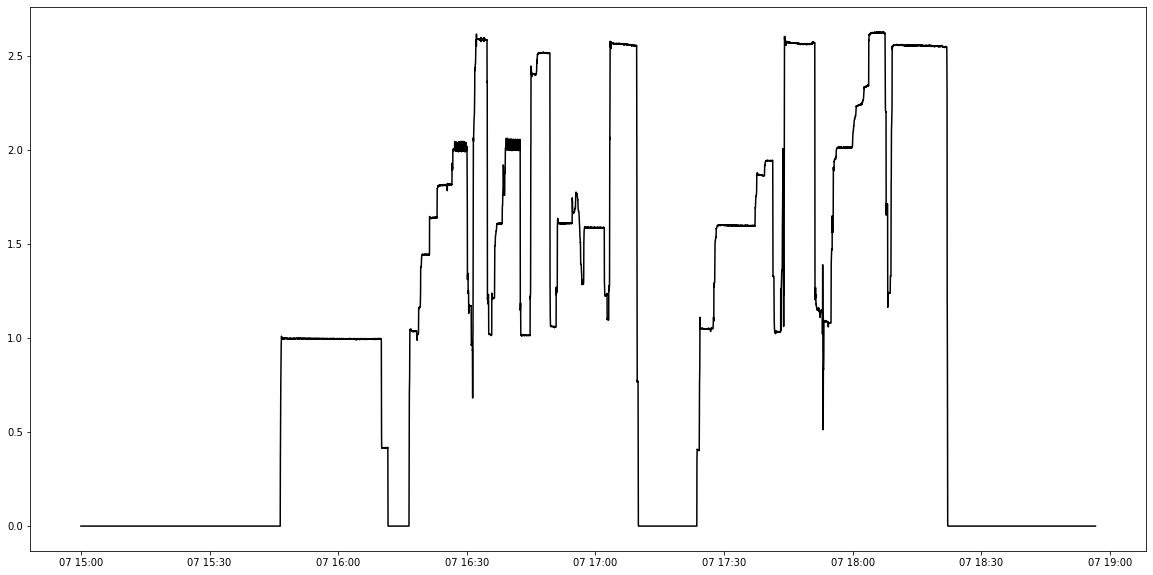

In [322]:
# Visualizing sections
plt.figure(figsize=(20,10))
plt.plot(data['DateTime'], data['p_rate'], color='black')

# Section 1 Analysis: Training Data

In [1162]:
#Getting a section of the data
data1=pd.DataFrame(data[(data.DateTime>'2020-05-07 17:57:40') & (data.DateTime<'2020-05-07 17:59:17')])

[Text(0, 0.5, 'Lateral')]

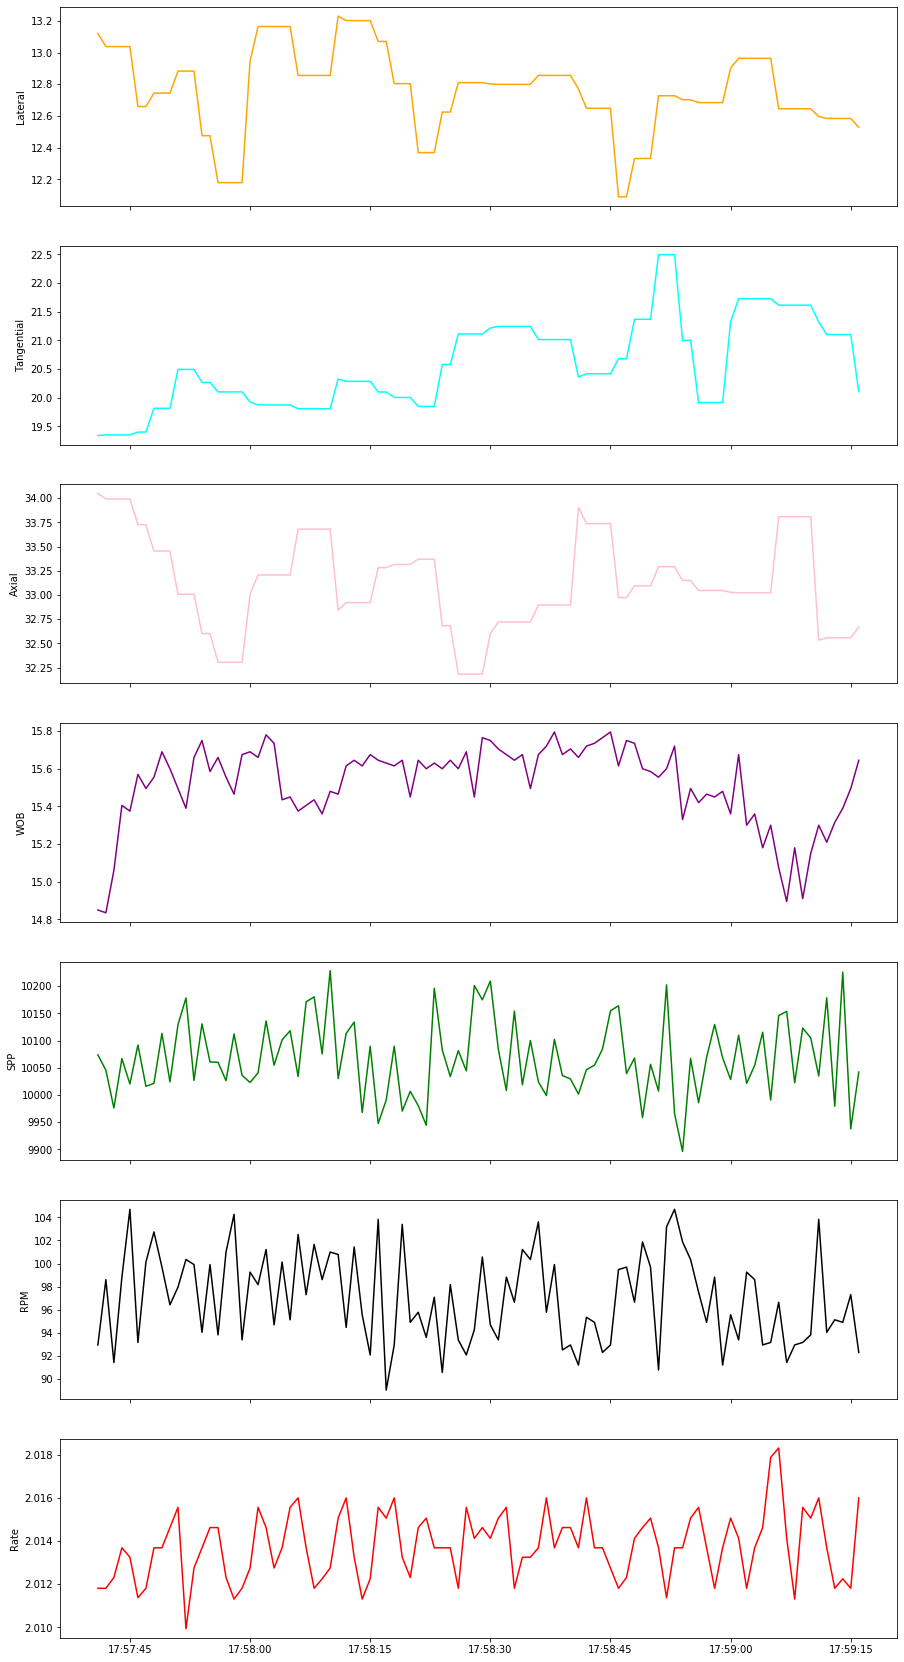

In [1163]:
#Visualizing data
fig, ax=plt.subplots(7,1, figsize=(15,30), sharex= True)

ax[6].plot(data1['DateTime'], data1['p_rate'], color='red')
ax[5].plot(data1['DateTime'], data1['rpm'], color='black')
ax[4].plot(data1['DateTime'], data1['SPP'], color='green')
ax[3].plot(data1['DateTime'], data1['wob'], color='purple')
ax[2].plot(data1['DateTime'], data1['shxrms_g'], color='pink')
ax[1].plot(data1['DateTime'], data1['shyrms_g'], color='cyan')
ax[0].plot(data1['DateTime'], data1['shzrms_g'], color='orange')

ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")


In [947]:
#Data for the analysis
X1=data1.drop(['Depth','Hook Load','SPP1','P_rate1','SPP2','P_rate2','torque','rop'], axis=1)

In [948]:
#Taking usefull features and standardize them
from sklearn.preprocessing import StandardScaler
sec1=X1.iloc[:,1:9]
scale=StandardScaler()
np_scaled=scale.fit_transform(sec1)
df1=pd.DataFrame(np_scaled)

In [1016]:
#Training the model
from sklearn.ensemble import IsolationForest
seed=12345
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(df1)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

# Notes
The contamination parameter simply controls the threshold for the decision function when a scored data point should be considered an outlier. 
It has no impact on the model itself.

In [1017]:
IF1_predict=model.predict(df1)
IF1_score=model.score_samples(df1)
IF1_predictions = pd.DataFrame({"predicted_class": list(map(lambda IF: 1*(IF == -1), IF_predict)), "predict": IF_score})
IF1_predictions

,predicted_class,predict
0,0,-0.394339
1,0,-0.394339
2,0,-0.394339
3,0,-0.394339
4,0,-0.393718
...,...,...
14194,0,-0.422898
14195,0,-0.421962
14196,0,-0.421486
14197,0,-0.422984


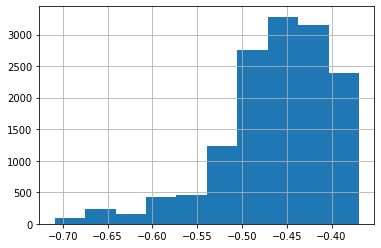

In [1018]:
IF1_predictions['predict'].hist()

In [1019]:
X1['anomaly']=IF1_predict

In [1020]:
outlier=X1.loc[X1['anomaly']==-1]
outlier_index=list(outlier.index)
print(X1['anomaly'].value_counts())

 1    95
-1     1
Name: anomaly, dtype: int64


In [1021]:
#Percentage of anomaly
print("Percentage of anomalies in data: {:.2f}".format((len(X1.loc[X1['anomaly']==-1])/len(X1))*100))

Percentage of anomalies in data: 1.04


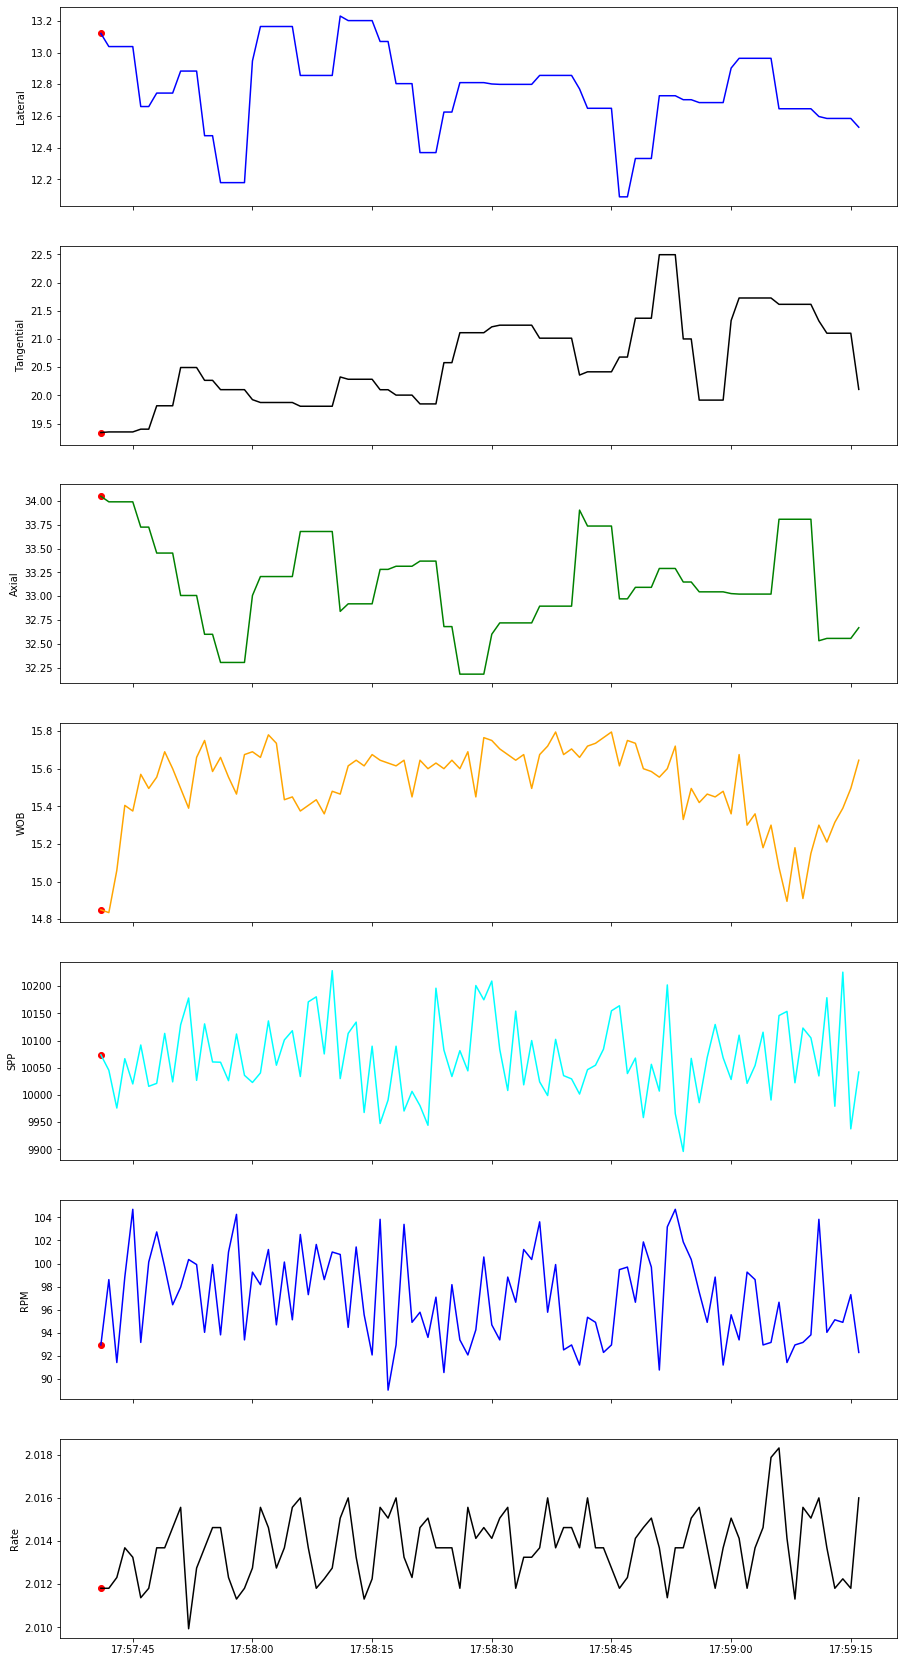

In [1022]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(7,1, figsize=(15,30), sharex=True)
a1 = X1[X1['anomaly']==-1] #anomaly

ax[0].plot(X1['DateTime'], X1['shzrms_g'], color='blue')
ax[0].scatter(a1['DateTime'],a1['shzrms_g'], color='red')
ax[1].plot(X1['DateTime'], X1['shyrms_g'], color='black')
ax[1].scatter(a1['DateTime'],a1['shyrms_g'], color='red')
ax[2].plot(X1['DateTime'], X1['shxrms_g'], color='green')
ax[2].scatter(a1['DateTime'],a1['shxrms_g'], color='red')
ax[3].plot(X1['DateTime'], X1['wob'], color='orange')
ax[3].scatter(a1['DateTime'],a1['wob'], color='red')
ax[4].plot(X1['DateTime'], X1['SPP'], color='cyan')
ax[4].scatter(a1['DateTime'],a1['SPP'], color='red')
ax[5].plot(X1['DateTime'], X1['rpm'], color='blue')
ax[5].scatter(a1['DateTime'],a1['rpm'], color='red')
ax[6].plot(X1['DateTime'], X1['p_rate'], color='black')
ax[6].scatter(a1['DateTime'],a1['p_rate'], color='red')


ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")



plt.show()

# Feature Importance

Feature ranking:
1. feature 1 (0.305315)
2. feature 2 (0.243171)
3. feature 0 (0.190616)
4. feature 3 (0.044747)
5. feature 5 (0.044197)
6. feature 6 (0.044079)
7. feature 8 (0.043370)
8. feature 7 (0.042895)
9. feature 4 (0.041610)


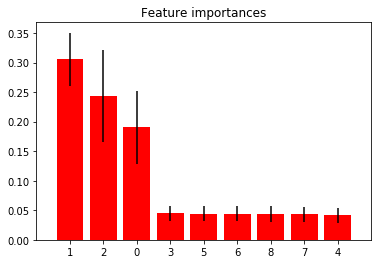

In [1073]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X=df1.iloc[:, 0:8]
y=X1.iloc[:,10]

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=9,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [1161]:
sec1

,rpm,wob,SPP,p_rate,gyroxrms(rpm),shxrms_g,shyrms_g,shzrms_g
10661,92.945313,14.850,10073.98440,2.011813,3.510620,34.049990,19.340361,13.120296
10662,98.609375,14.835,10045.54690,2.011813,3.379208,33.991927,19.351102,13.037601
10663,91.421875,15.060,9976.09380,2.012313,3.379208,33.991927,19.351102,13.037601
10664,98.828125,15.405,10066.87505,2.013688,3.379208,33.991927,19.351102,13.037601
10665,104.703125,15.375,10020.39065,2.013250,3.379208,33.991927,19.351102,13.037601
...,...,...,...,...,...,...,...,...
10752,94.039063,15.210,10178.98440,2.013688,3.706121,32.557568,21.102175,12.584297
10753,95.125000,15.315,9979.37500,2.011813,3.706121,32.557568,21.102175,12.584297
10754,94.906250,15.390,10226.01565,2.012250,3.706121,32.557568,21.102175,12.584297
10755,97.304688,15.495,9937.81255,2.011813,3.706121,32.557568,21.102175,12.584297


# Testing the model

In [1075]:
#Getting a section of the data
test1=pd.DataFrame(data[(data.DateTime>'2020-05-07 17:44:40') & (data.DateTime<'2020-05-07 18:20:00')])

[Text(0, 0.5, 'Lateral')]

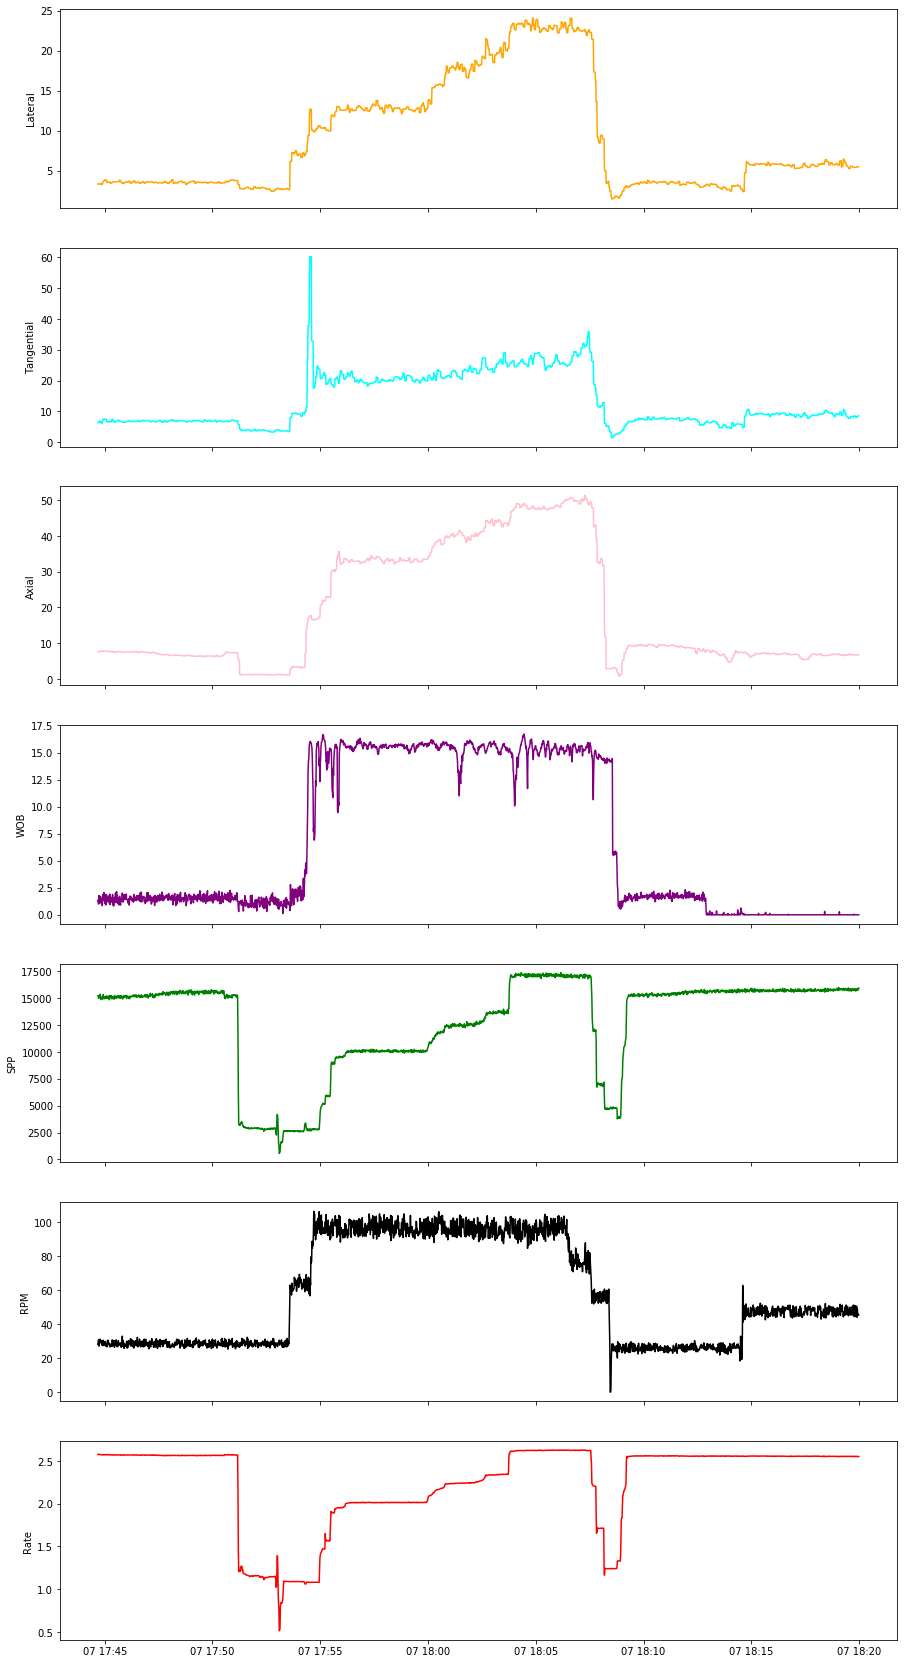

In [1076]:
#Visualizing data
fig, ax=plt.subplots(7,1, figsize=(15,30), sharex= True)

ax[6].plot(test1['DateTime'], test1['p_rate'], color='red')
ax[5].plot(test1['DateTime'], test1['rpm'], color='black')
ax[4].plot(test1['DateTime'], test1['SPP'], color='green')
ax[3].plot(test1['DateTime'], test1['wob'], color='purple')
ax[2].plot(test1['DateTime'], test1['shxrms_g'], color='pink')
ax[1].plot(test1['DateTime'], test1['shyrms_g'], color='cyan')
ax[0].plot(test1['DateTime'], test1['shzrms_g'], color='orange')

ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")

In [1077]:
test1_data=test1.drop(['Depth','Hook Load','SPP1','P_rate1','SPP2','P_rate2','torque','rop'], axis=1)
test1_feature=test1_data.iloc[:,1:9]
scale=StandardScaler()
np_scaled=scale.fit_transform(test1_feature)
df_test1=pd.DataFrame(np_scaled)

In [1078]:
test1_predict=model.predict(df_test1)
test1_score=model.score_samples(df_test1)
test1_predictions = pd.DataFrame({"predicted_class": list(map(lambda IF: 1*(IF == -1), test1_predict)), "predict": test1_score})
test1_predictions

,predicted_class,predict
0,0,-0.438955
1,0,-0.438588
2,0,-0.439507
3,0,-0.440437
4,0,-0.438588
...,...,...
2114,0,-0.423699
2115,0,-0.430294
2116,0,-0.431671
2117,0,-0.432074


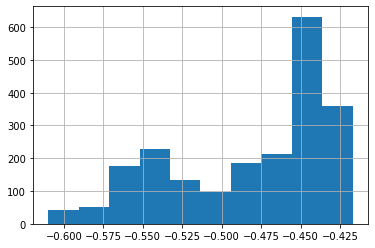

In [1079]:
test1_predictions['predict'].hist()

In [1080]:
test1['anomaly']=test1_predict

In [1081]:
outlier=test1.loc[test1['anomaly']==-1]
outlier_index=list(outlier.index)
print(test1['anomaly'].value_counts())

 1    2010
-1     109
Name: anomaly, dtype: int64


In [1082]:
#Percentage of anomaly
print("Percentage of anomalies in data: {:2f}".format((len(test1.loc[test1['anomaly']==-1])/len(test1))*100))

Percentage of anomalies in data: 5.143936


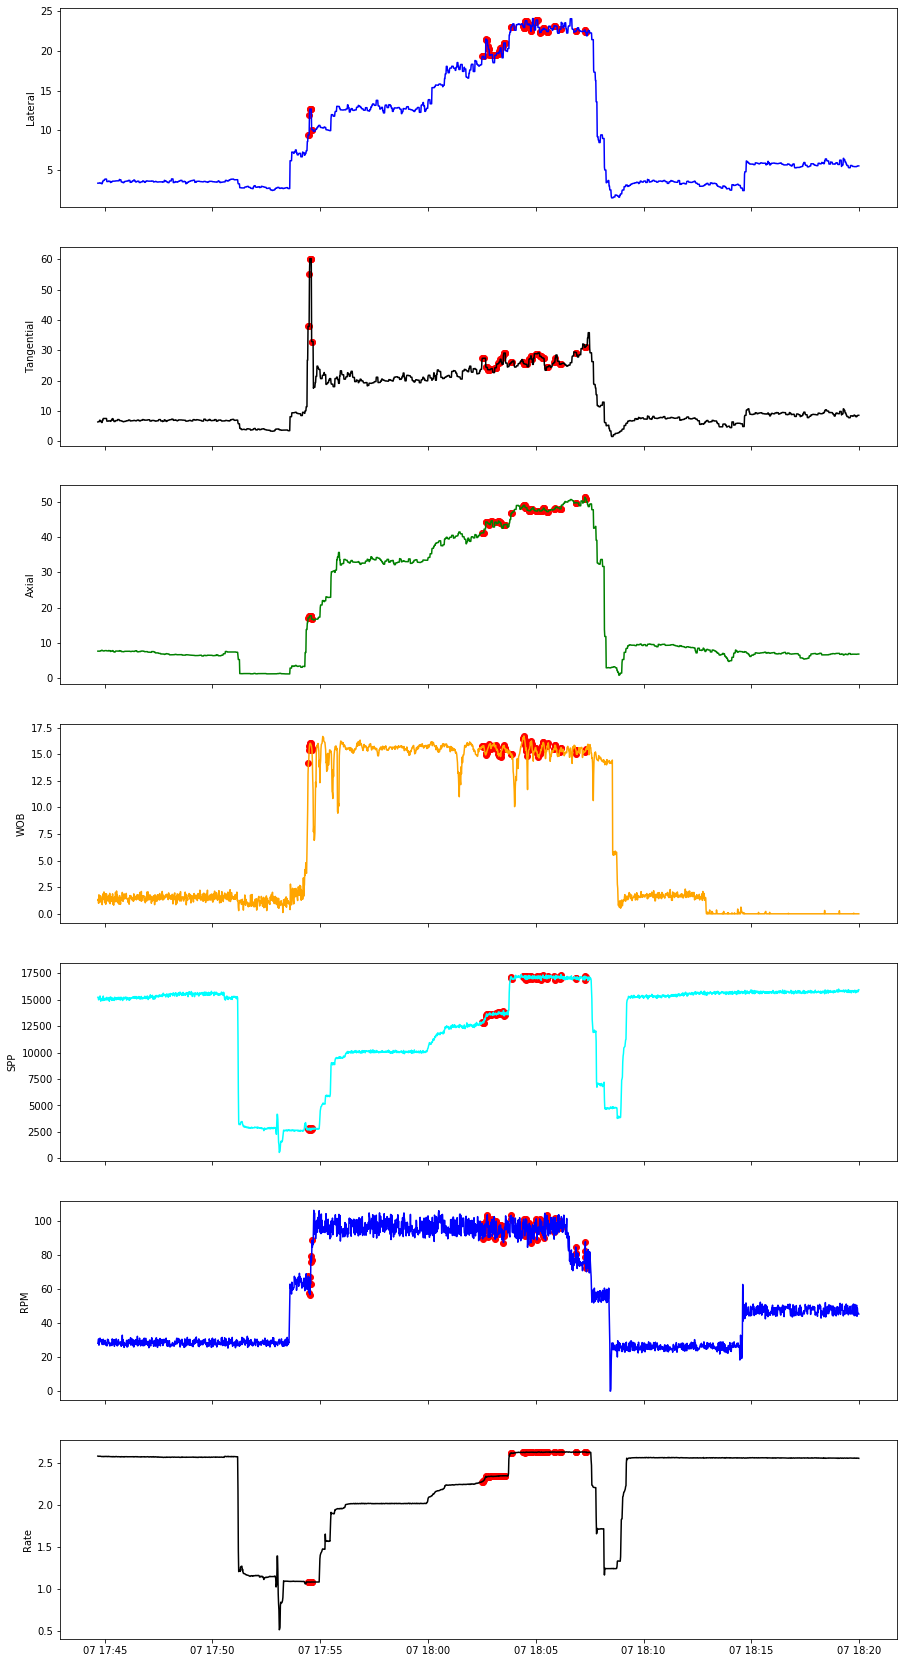

In [1087]:
# visualisation of anomaly throughout time of the test data
fig, ax = plt.subplots(7,1, figsize=(15,30), sharex=True)
a1 = test1[test1['anomaly']==-1] #anomaly

ax[0].plot(test1['DateTime'], test1['shzrms_g'], color='blue')
ax[0].scatter(a1['DateTime'],a1['shzrms_g'], color='red')
ax[1].plot(test1['DateTime'], test1['shyrms_g'], color='black')
ax[1].scatter(a1['DateTime'],a1['shyrms_g'], color='red')
ax[2].plot(test1['DateTime'], test1['shxrms_g'], color='green')
ax[2].scatter(a1['DateTime'],a1['shxrms_g'], color='red')
ax[3].plot(test1['DateTime'], test1['wob'], color='orange')
ax[3].scatter(a1['DateTime'],a1['wob'], color='red')
ax[4].plot(test1['DateTime'], test1['SPP'], color='cyan')
ax[4].scatter(a1['DateTime'],a1['SPP'], color='red')
ax[5].plot(test1['DateTime'], test1['rpm'], color='blue')
ax[5].scatter(a1['DateTime'],a1['rpm'], color='red')
ax[6].plot(test1['DateTime'], test1['p_rate'], color='black')
ax[6].scatter(a1['DateTime'],a1['p_rate'], color='red')


ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")



plt.show()

# Test 2

In [1139]:
#Getting a section of the data
test2=pd.DataFrame(data[(data.DateTime>'2020-05-07 16:20:00') & (data.DateTime<'2020-05-07 17:09:00')])

[Text(0, 0.5, 'Lateral')]

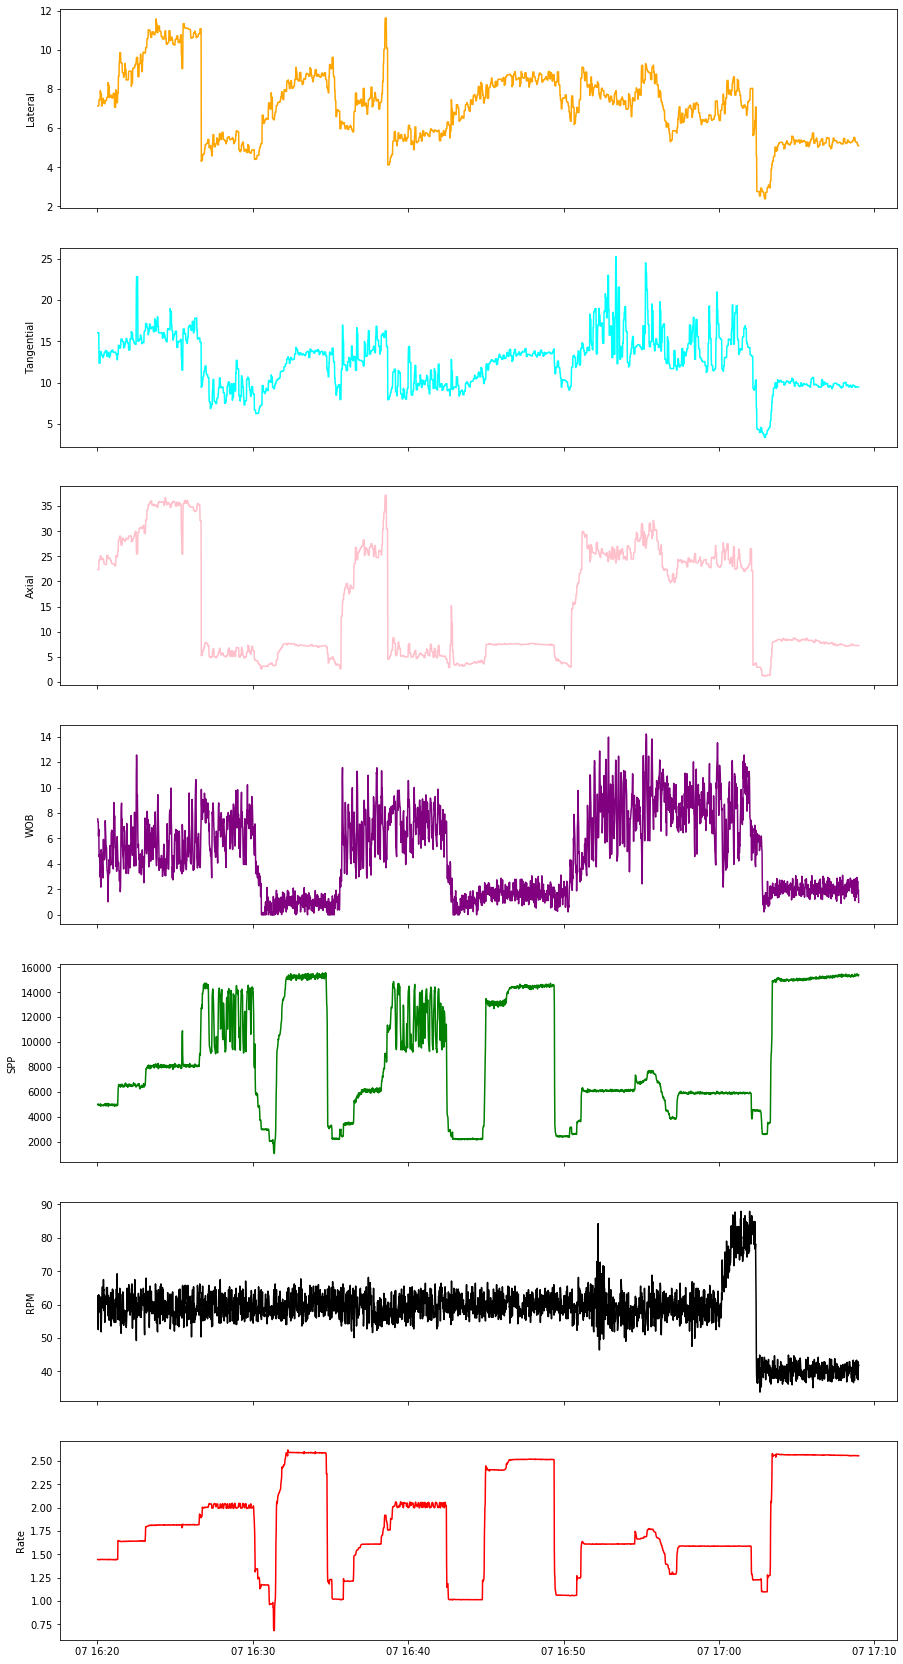

In [1140]:
#Visualizing data
fig, ax=plt.subplots(7,1, figsize=(15,30), sharex= True)

ax[6].plot(test2['DateTime'], test2['p_rate'], color='red')
ax[5].plot(test2['DateTime'], test2['rpm'], color='black')
ax[4].plot(test2['DateTime'], test2['SPP'], color='green')
ax[3].plot(test2['DateTime'], test2['wob'], color='purple')
ax[2].plot(test2['DateTime'], test2['shxrms_g'], color='pink')
ax[1].plot(test2['DateTime'], test2['shyrms_g'], color='cyan')
ax[0].plot(test2['DateTime'], test2['shzrms_g'], color='orange')

ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")

In [1141]:
test2_data=test2.drop(['Depth','Hook Load','SPP1','P_rate1','SPP2','P_rate2','torque','rop'], axis=1)
test2_feature=test2_data.iloc[:,1:9]
scale=StandardScaler()
np_scaled=scale.fit_transform(test2_feature)
df_test2=pd.DataFrame(np_scaled)

In [1142]:
test2_predict=model.predict(df_test2)
test2_score=model.score_samples(df_test2)
test2_predictions = pd.DataFrame({"predicted_class": list(map(lambda IF: 1*(IF == -1), test2_predict)), "predict": test2_score})
test2_predictions

,predicted_class,predict
0,0,-0.443837
1,0,-0.435756
2,0,-0.442247
3,0,-0.434790
4,0,-0.429503
...,...,...
2934,0,-0.525630
2935,0,-0.521315
2936,0,-0.530311
2937,0,-0.528006


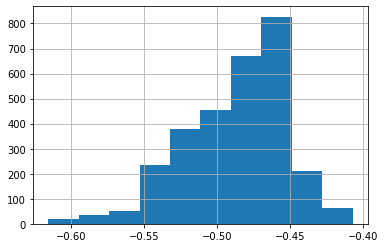

In [1148]:
test2_predictions['predict'].hist()

In [1149]:
test2['anomaly']=test2_predict

In [1150]:
outlier=test2.loc[test2['anomaly']==-1]
outlier_index=list(outlier.index)
print(test2['anomaly'].value_counts())

 1    2873
-1      66
Name: anomaly, dtype: int64


In [1151]:
#Percentage of anomaly
print("Percentage of anomalies in data: {:2f}".format((len(test2.loc[test2['anomaly']==-1])/len(test2))*100))

Percentage of anomalies in data: 2.245662


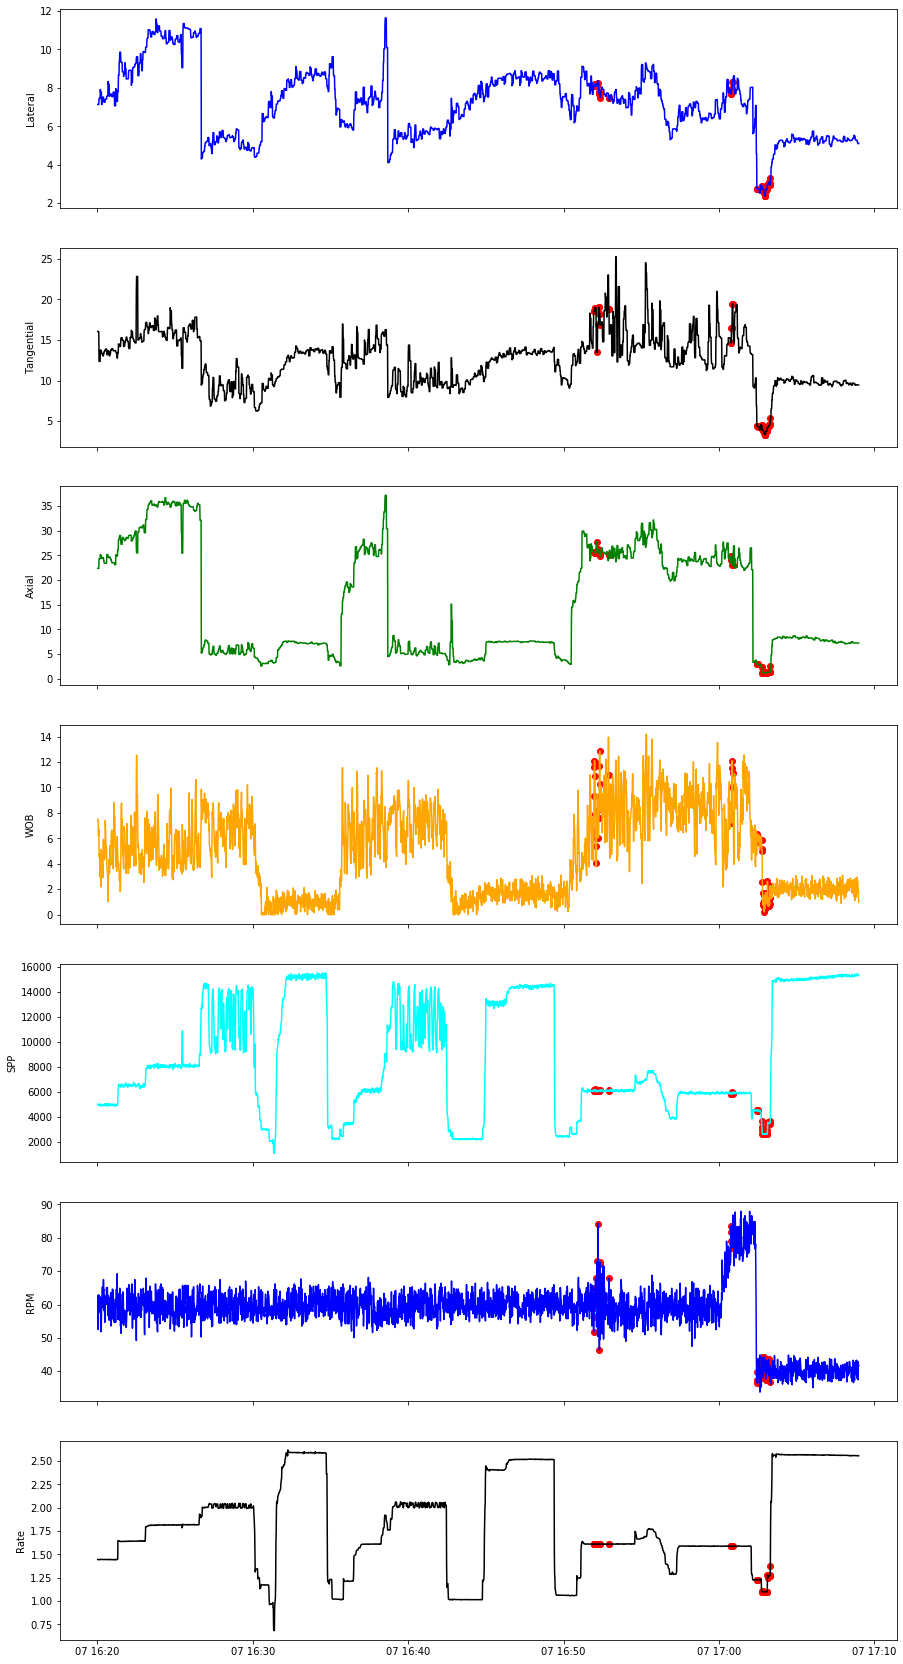

In [1152]:
# visualisation of anomaly throughout time of the test data
fig, ax = plt.subplots(7,1, figsize=(15,30), sharex=True)
a1 = test2[test2['anomaly']==-1] #anomaly

ax[0].plot(test2['DateTime'], test2['shzrms_g'], color='blue')
ax[0].scatter(a1['DateTime'],a1['shzrms_g'], color='red')
ax[1].plot(test2['DateTime'], test2['shyrms_g'], color='black')
ax[1].scatter(a1['DateTime'],a1['shyrms_g'], color='red')
ax[2].plot(test2['DateTime'], test2['shxrms_g'], color='green')
ax[2].scatter(a1['DateTime'],a1['shxrms_g'], color='red')
ax[3].plot(test2['DateTime'], test2['wob'], color='orange')
ax[3].scatter(a1['DateTime'],a1['wob'], color='red')
ax[4].plot(test2['DateTime'], test2['SPP'], color='cyan')
ax[4].scatter(a1['DateTime'],a1['SPP'], color='red')
ax[5].plot(test2['DateTime'], test2['rpm'], color='blue')
ax[5].scatter(a1['DateTime'],a1['rpm'], color='red')
ax[6].plot(test2['DateTime'], test2['p_rate'], color='black')
ax[6].scatter(a1['DateTime'],a1['p_rate'], color='red')


ax[6].set(ylabel="Rate")
ax[5].set(ylabel="RPM")
ax[4].set(ylabel="SPP")
ax[3].set(ylabel="WOB")
ax[2].set(ylabel="Axial")
ax[1].set(ylabel="Tangential")
ax[0].set(ylabel="Lateral")



plt.show()

# H20

In [315]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 15 mins
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_cheta_pdesqq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,43.01 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [316]:
data_n=h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [319]:
from h2o.estimators import H2OIsolationForestEstimator
X=['SPP','rpm','wob','p_rate','shxrms_g','shyrms_g','shzrms_g']

In [320]:
isolation_model = H2OIsolationForestEstimator(model_id = "isolation_forest.hex", seed = 1234)
isolation_model.train(training_frame = data_n, x = X)

isolationforest Model Build progress: |███████████████████████████████████| 100%


In [321]:
predictions = isolation_model.predict(data_n)
predictions.head()

isolationforest prediction progress: |████████████████████████████████████| 100%


predict,mean_length
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48
0.18705,6.48


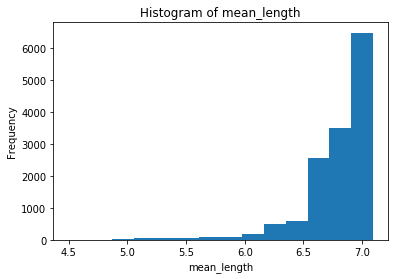

In [322]:
predictions["mean_length"].hist()

# Interpreting Anomalies
There are two levels of interpretation:

global level: high level understanding of what segments of data are considered anomalous
local level: understanding of why an individual record is considered anomalous
We will start with the global level. Our goal is to gain an understanding of what segments of data are considered anomalous.

Global Level
Now that we have found anomalous data, we are interested in why they are considered anomalies. To do this, we will train a surrogate decision tree. The purpose of the surrogate decision tree is to find records with the anomaly flag. To do this, it will find segments of similar anomalies and discover how to separate them from records that are not anomalies. We can use this decision tree to then describe anomalous segments of the data.

The steps of interpreting anomalies on a global level are:

1. Create a frame with a column that indicates whether the record was considered an anomaly.
2. Train a decision tree to predict the anomaly flag.
3. Visualize the decision tree to determine which segments of the data are considered anomalous.
In our first step, we will add a column called anomaly. This is a flag that indicates whether the isolation forest considered the record an anomaly.

In [323]:
global_surrogate_data = data_n
global_surrogate_data["anomaly"] = (predictions["mean_length"] < 5.5).ifelse("Yes", "No")
global_surrogate_data["anomaly"].table()

anomaly,Count
No,13879
Yes,320


Now that we have the surrogate data, we can train a single decision tree to predict the anomaly flag. We will keep this decision tree simple (only a single decision tree with a depth of 3) because the purpose of the decision tree is to be completely interpretable.

In [324]:
from h2o.estimators import H2ORandomForestEstimator

global_surrogate_dt = H2ORandomForestEstimator(model_id = "global_surrogate_decision_tree.hex", 
                                               ntrees = 1, max_depth = 3,
                                               sample_rate = 1, mtries = len(X))
global_surrogate_dt.train(training_frame = global_surrogate_data, x = X, y = "anomaly")

drf Model Build progress: |███████████████████████████████████████████████| 100%


We can now visualize the decision tree to find segments of the data that are anomalous.

In [325]:
import os
import subprocess
from IPython.display import Image
def generateTreeImage(decision_tree, image_file_path):
    # Download MOJO
    mojo_path = decision_tree.download_mojo(get_genmodel_jar=True)
    directory = os.path.dirname(mojo_path)
    h2o_jar_path = os.path.join(directory, "h2o-genmodel.jar")
    # Create Graphviz file
    gv_file_path = os.path.join(directory, "decision_tree.gv")
    gv_call = " ".join(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree 0 -i", mojo_path , "-o", gv_file_path])
    result = subprocess.call(gv_call, shell=True)
    result = subprocess.call(["ls", gv_file_path], shell = False)
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    
    return Image(image_file_path)


In [328]:
generateTreeImage(global_surrogate_dt, r'C:\Users\cheta\OneDrive\Desktop\Eavor\Analysis\global_surrogate_decision_tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified